In [1]:
from data_loader import DataLoader
from strategies import MovingAverageStrategy, RSIStrategy, MACDStrategy, LinearRegressionStrategy, PolynomialRegressionStrategy, RandomForestStrategy
from backtester import Backtester
from visualizer import Visualizer
import yaml

"""
Main function to run the backtesting process for all trading strategies.

This function loads configuration, data, initializes strategies,
runs backtesting, and visualizes results.
"""
# 1. Load configuration
with open('config.yaml', 'r', encoding='utf-8') as f:
    config = yaml.safe_load(f)

initial_capital = config.get('initial_capital', 100000)

In [2]:
# 2. Load data
print("Loading stock data...")
data_loader = DataLoader()
data = data_loader.get_data()
print(f"Successfully loaded {len(data)} stock data entries")

Loading stock data...
Reading data from file: stock_data/9988.csv
Successfully loaded 1433 stock data entries


In [3]:
 # 3. Initialize strategies
strategies = {
    'Moving Average Strategy': MovingAverageStrategy(
        data,
        params=config['strategies']['moving_average']
    ),
    'RSI Strategy': RSIStrategy(
        data,
        params=config['strategies']['rsi']
    ),
    'MACD Strategy': MACDStrategy(
        data,
        params=config['strategies']['macd']
    ),
    'Linear Regression Strategy': LinearRegressionStrategy(
        data,
        params=config['strategies'].get('ml', {})
    ),
    'Polynomial Regression Strategy': PolynomialRegressionStrategy(
        data,
        params=config['strategies'].get('ml', {})
    ),
    'Random Forest Strategy': RandomForestStrategy(
        data,
        params=config['strategies'].get('ml', {})
    )
}

In [4]:
# 4. Run backtesting and collect results
results = {}
metrics = {}

print("Running strategy backtesting...")
for name, strategy in strategies.items():
    print(f"Running {name}...")
    backtester = Backtester(data, strategy, initial_capital)
    strategy_results = backtester.run()
    strategy_metrics = backtester.get_metrics()

    results[name] = strategy_results
    metrics[name] = strategy_metrics

    print(f"{name} backtesting completed. Total return: {strategy_metrics['总收益率(%)']}%")

Running strategy backtesting...
Running Moving Average Strategy...
Buy: 2019-12-02, Price: 195.50, Shares: 511, Cash left: 99.50
Sell: 2019-12-03, Price: 192.60, Shares: 511, Cash: 98518.10
Buy: 2019-12-09, Price: 196.60, Shares: 501, Cash left: 21.50
Sell: 2020-01-02, Price: 210.00, Shares: 501, Cash: 105231.50
Buy: 2020-01-06, Price: 211.00, Shares: 498, Cash left: 153.50
Sell: 2020-01-17, Price: 220.40, Shares: 498, Cash: 109912.70
Buy: 2020-02-04, Price: 213.20, Shares: 515, Cash left: 114.70
Sell: 2020-02-11, Price: 212.20, Shares: 515, Cash: 109397.70
Buy: 2020-02-13, Price: 217.20, Shares: 503, Cash left: 146.10
Sell: 2020-02-18, Price: 214.00, Shares: 503, Cash: 107788.10
Buy: 2020-03-04, Price: 202.20, Shares: 533, Cash left: 15.50
Sell: 2020-03-09, Price: 193.50, Shares: 533, Cash: 103151.00
Buy: 2020-03-24, Price: 174.50, Shares: 591, Cash left: 21.50
Sell: 2020-03-25, Price: 179.70, Shares: 591, Cash: 106224.20
Buy: 2020-03-26, Price: 180.90, Shares: 587, Cash left: 35.90
S

Generating visualization results...


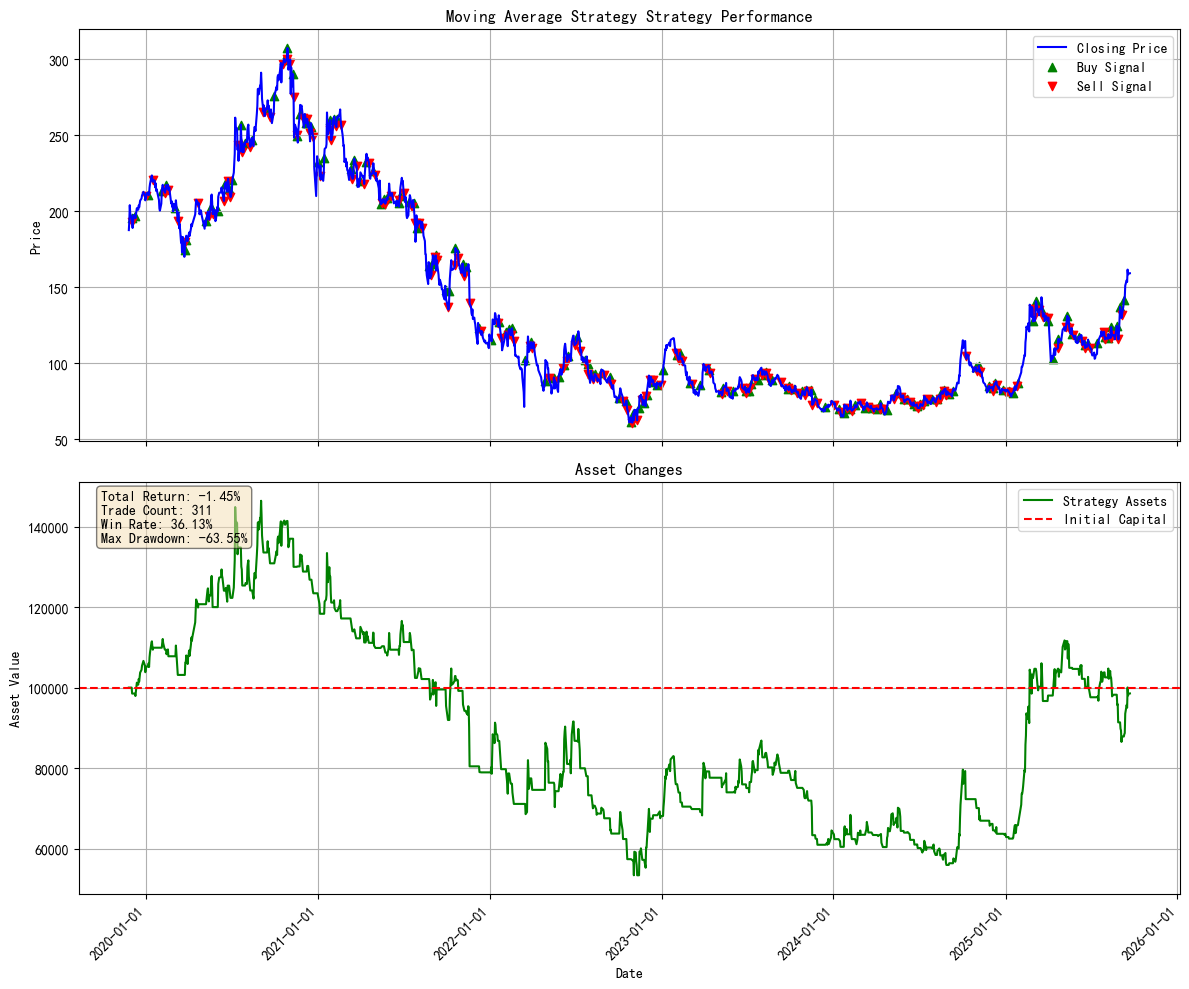

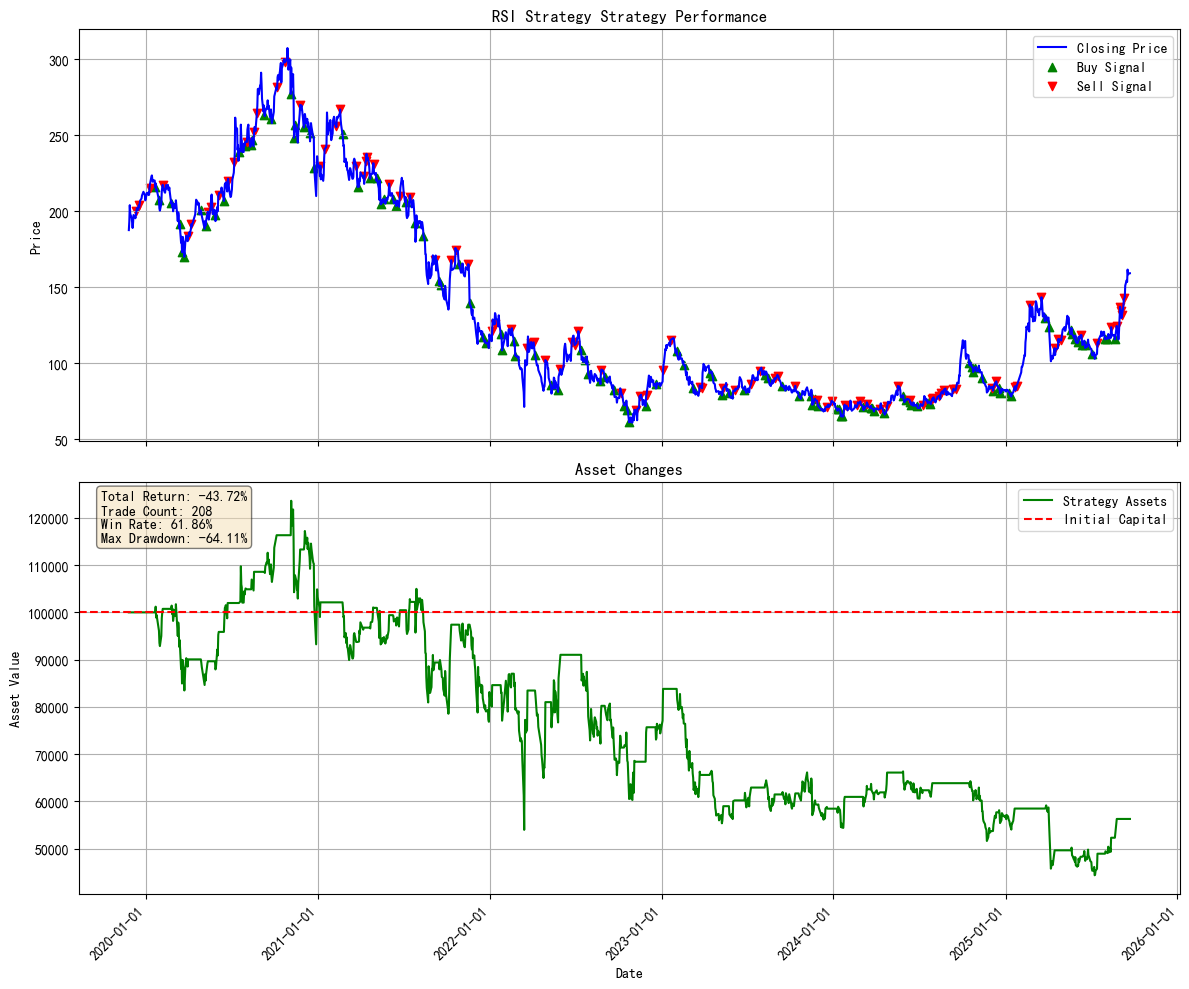

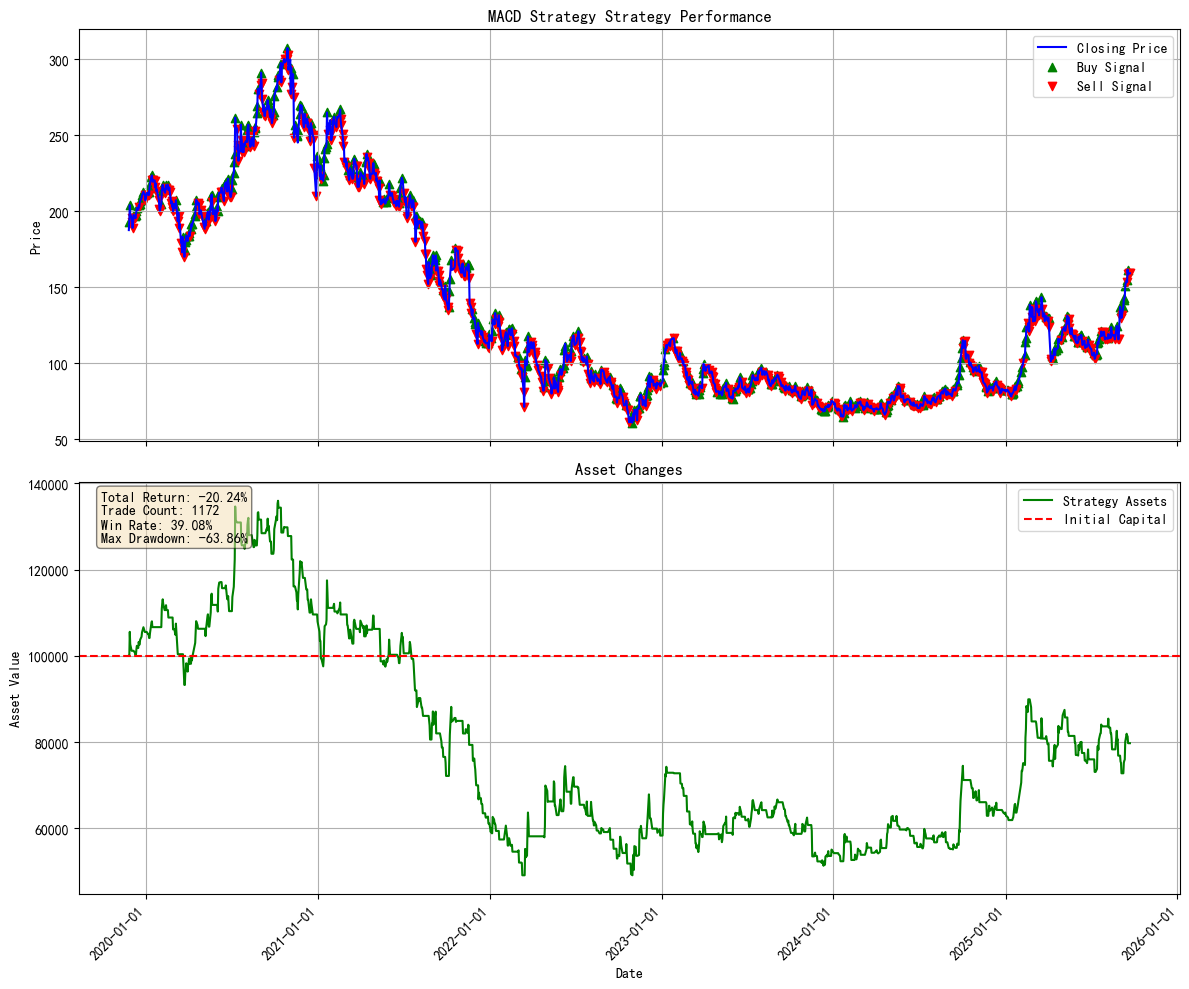

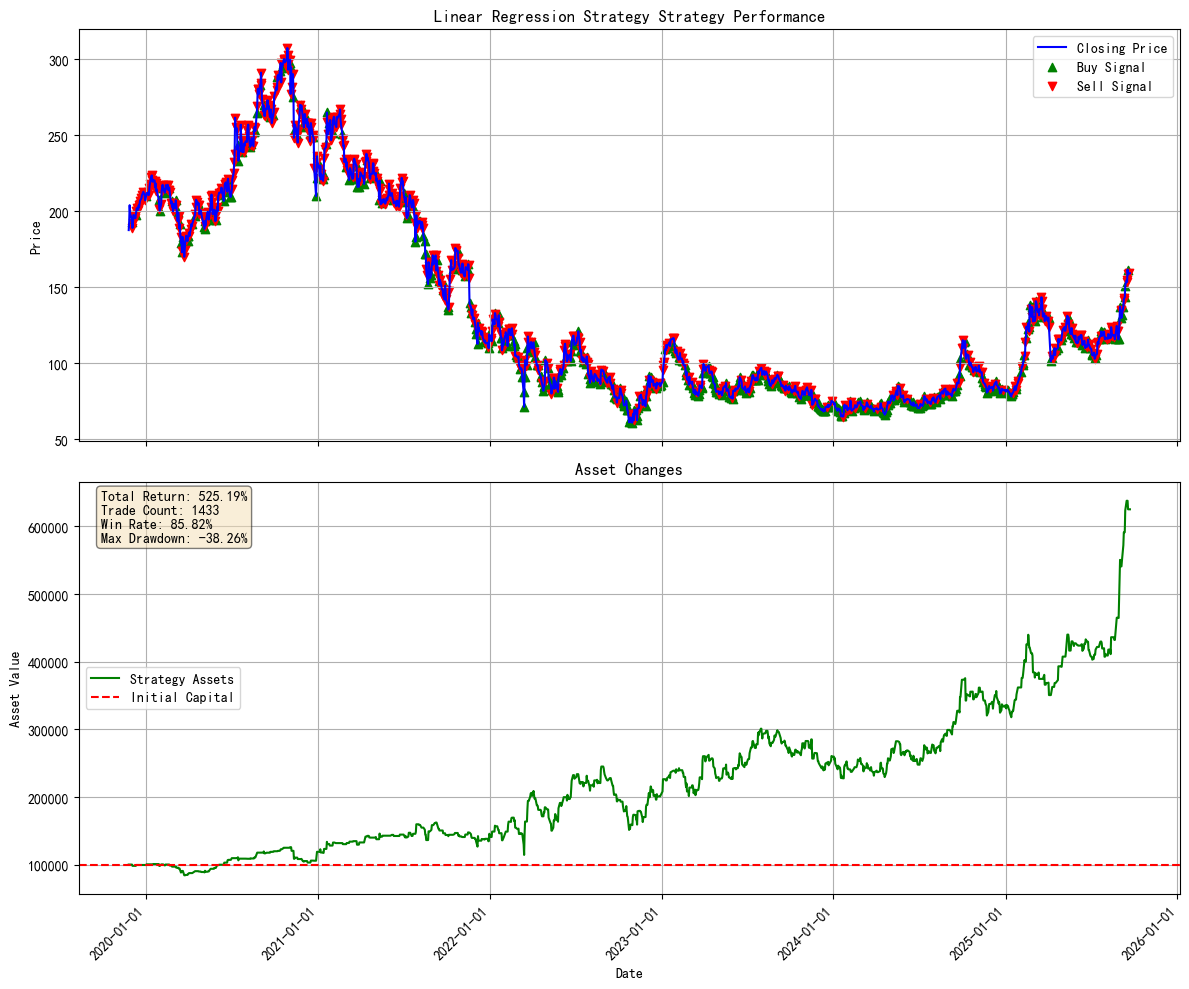

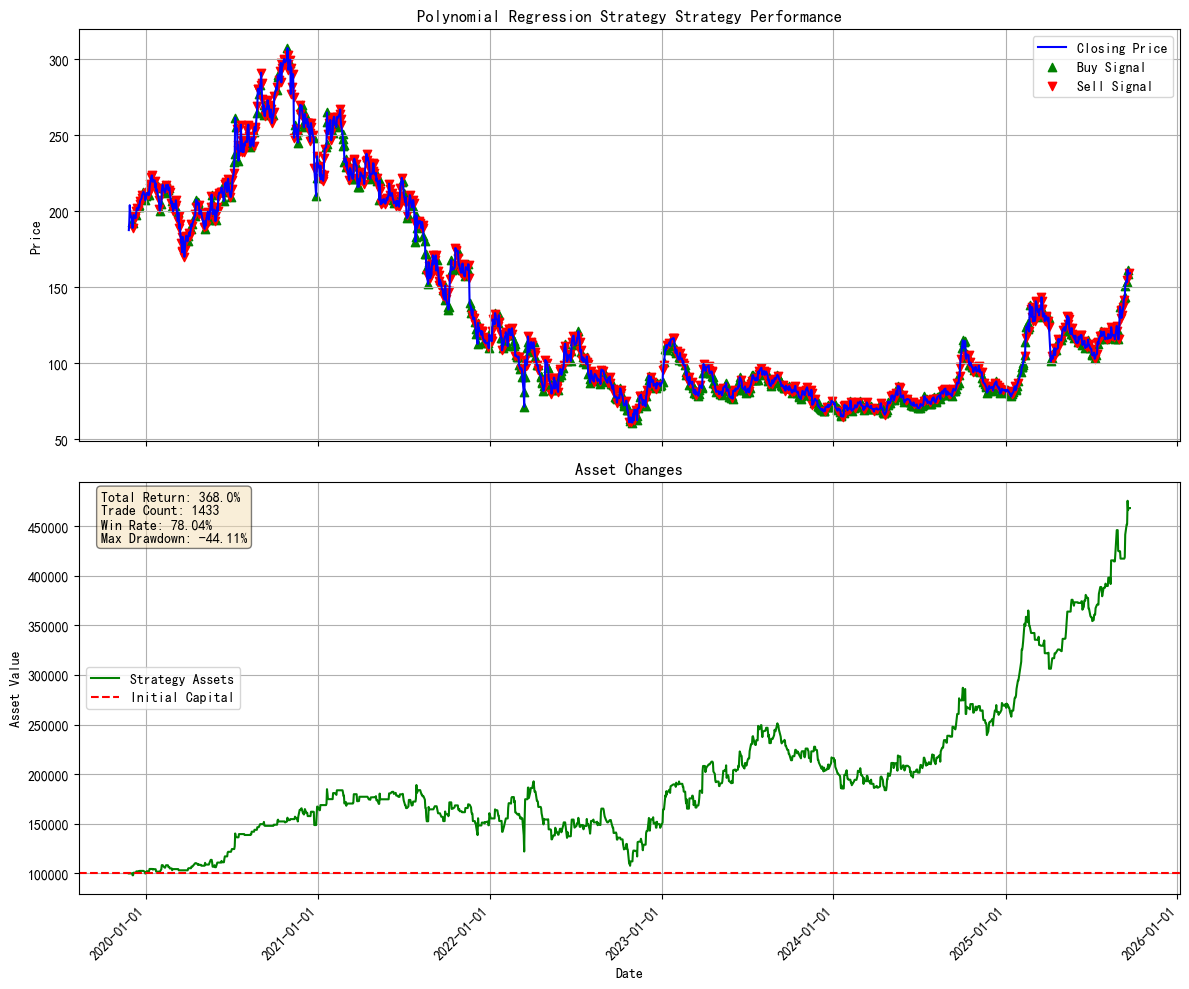

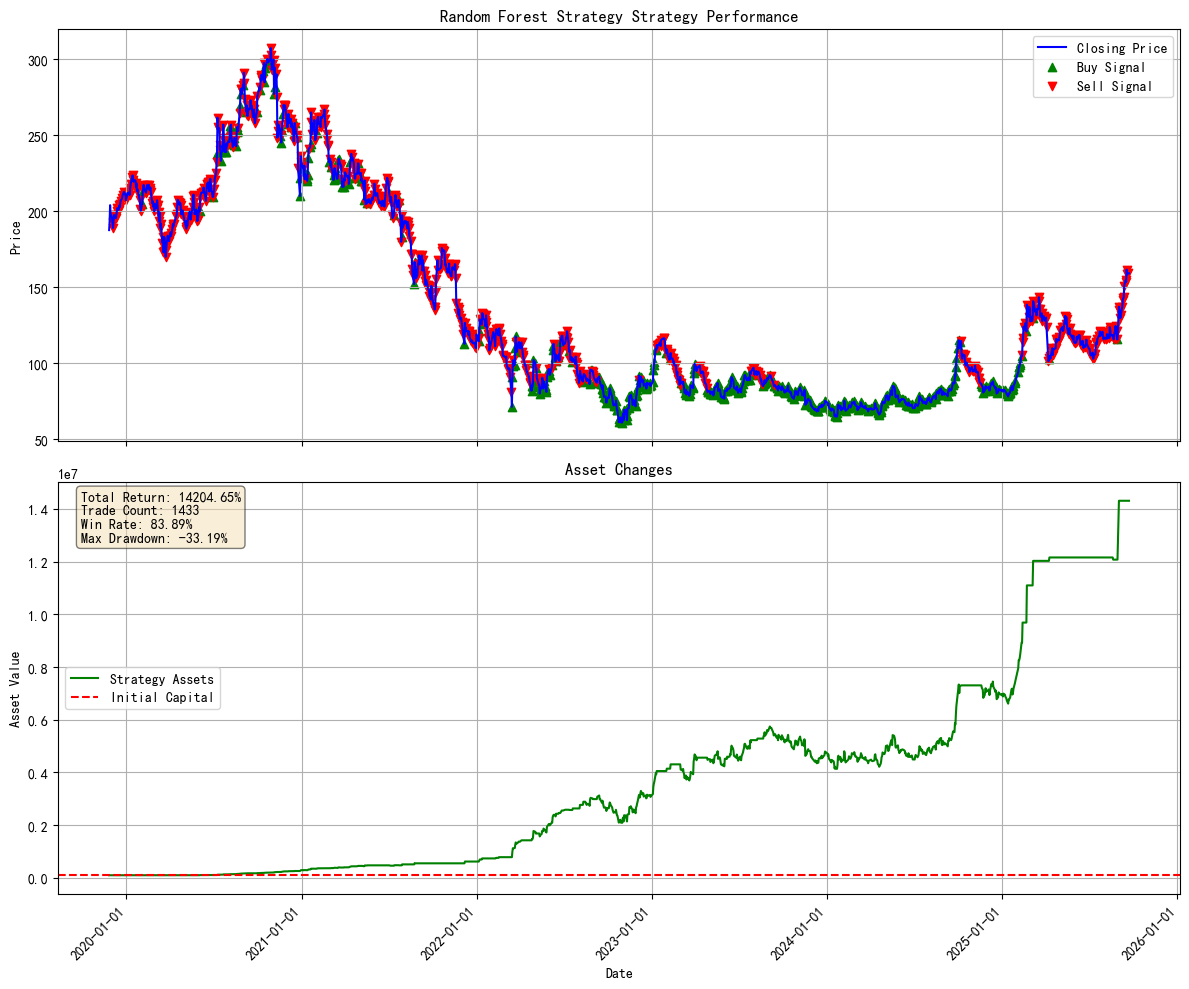

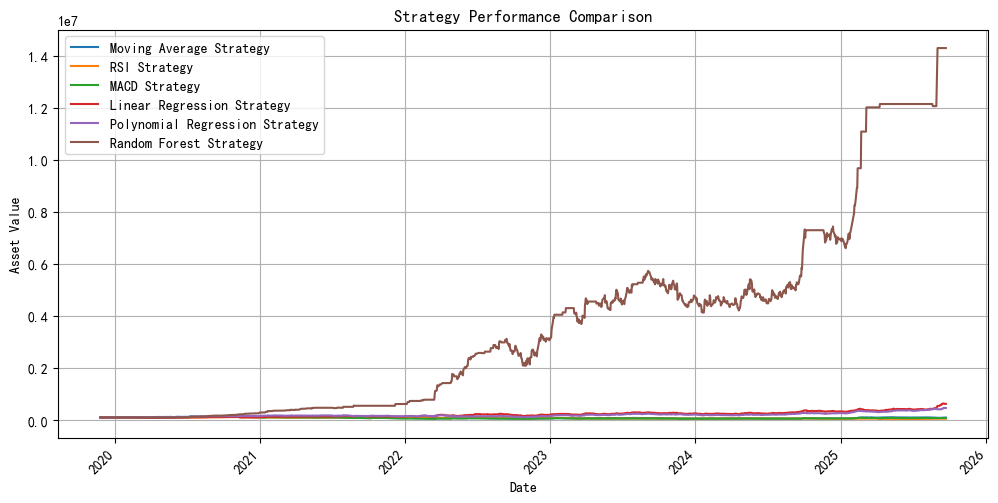

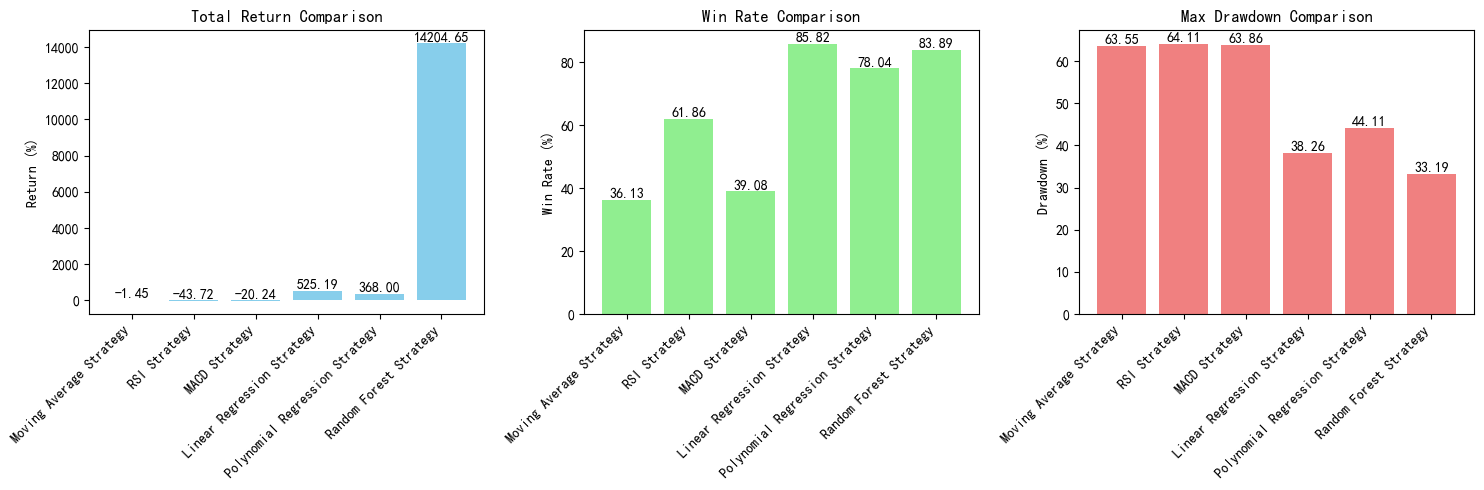

In [5]:
# 5. Visualize results
print("Generating visualization results...")
visualizer = Visualizer()

# Plot detailed performance for each strategy
for name, result in results.items():
    visualizer.plot_strategy_performance(result, name, metrics[name])

# Plot strategy comparison
visualizer.plot_strategies_comparison(results)
visualizer.plot_metrics_comparison(metrics)

In [6]:
# 6. Print strategy comparison summary
import pandas as pd

print("\nStrategy Comparison Summary:")
# 创建一个DataFrame来更好地显示数据
comparison_data = []
for name, metric in metrics.items():
    comparison_data.append({
        'Strategy Name': name,
        'Total Return(%)': metric['总收益率(%)'],
        'Trades': metric['交易次数'],
        'Win Rate(%)': metric['胜率(%)'],
        'Max Drawdown(%)': metric['最大回撤(%)']
    })

# 创建DataFrame并显示
comparison_df = pd.DataFrame(comparison_data)
# 设置列的显示顺序
column_order = ['Strategy Name', 'Total Return(%)', 'Trades', 'Win Rate(%)', 'Max Drawdown(%)']
comparison_df = comparison_df[column_order]

# 格式化数值并显示
styled_df = comparison_df.style.format({
    'Total Return(%)': '{:.2f}',
    'Win Rate(%)': '{:.2f}',
    'Max Drawdown(%)': '{:.2f}'
}).set_properties(**{
    'text-align': 'center'
}).set_table_styles([
    {'selector': 'th', 'props': [('text-align', 'center')]},
    {'selector': '', 'props': [('border', '1px solid black')]}
])

# 显示表格
display(styled_df)


Strategy Comparison Summary:


,Strategy Name,Total Return(%),Trades,Win Rate(%),Max Drawdown(%)
0,Moving Average Strategy,-1.45,311,36.13,-63.55
1,RSI Strategy,-43.72,208,61.86,-64.11
2,MACD Strategy,-20.24,1172,39.08,-63.86
3,Linear Regression Strategy,525.19,1433,85.82,-38.26
4,Polynomial Regression Strategy,368.00,1433,78.04,-44.11
5,Random Forest Strategy,14204.65,1433,83.89,-33.19
